In [1]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline  

In [2]:
mypath = '/Users/Lucy/Google Drive/MSDS/2016Fall/DSGA1006/Data/csv_export'
files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [3]:
files[1:]

['acquisitions.csv',
 'category_groups.csv',
 'competitors.csv',
 'crunchbase_license.txt',
 'customers.csv',
 'event_relationships.csv',
 'events.csv',
 'funding_rounds.csv',
 'funds.csv',
 'investment_partners.csv',
 'investments.csv',
 'investors.csv',
 'ipos.csv',
 'jobs.csv',
 'org_parents.csv',
 'organization_descriptions.csv',
 'organizations.csv',
 'people.csv',
 'people_descriptions.csv']

In [4]:
investments = pd.read_csv(mypath + '/investments.csv')
orgs = pd.read_csv(mypath + '/organizations.csv')
org_descs = pd.read_csv(mypath + '/organization_descriptions.csv')
investors = pd.read_csv(mypath + '/investors.csv')
rounds = pd.read_csv(mypath + '/funding_rounds.csv')
funds = pd.read_csv(mypath + '/funds.csv')
comps = pd.read_csv(mypath + '/competitors.csv')

/Users/Lucy/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Clean up orgs

In [7]:
orgs.shape

(473721, 31)

In [8]:
orgs[orgs.primary_role == 'company'].shape

(429288, 31)

In [9]:
orgs.loc[0]

company_name                                                   Soko Glam
primary_role                                                     company
domain                                                      sokoglam.com
homepage_url                                     http://www.sokoglam.com
country_code                                                         USA
state_code                                                            NY
region                                                     New York City
city                                                            New York
zipcode                                                              NaN
address                                                              NaN
status                                                         operating
short_description      An eCommerce beauty shop that thoughtfully cur...
category_list                                beauty|cosmetics|e-commerce
category_group_list                 commerce and sh

In [10]:
new_orgs = pd.merge(orgs, org_descs, on = 'uuid')

In [11]:
new_orgs.shape

(289795, 32)

In [7]:
orgs.loc[0]

company_name                                                   Soko Glam
primary_role                                                     company
domain                                                      sokoglam.com
homepage_url                                     http://www.sokoglam.com
country_code                                                         USA
state_code                                                            NY
region                                                     New York City
city                                                            New York
zipcode                                                              NaN
address                                                              NaN
status                                                         operating
short_description      An eCommerce beauty shop that thoughtfully cur...
category_list                                beauty|cosmetics|e-commerce
category_group_list                 commerce and sh

In [8]:
set(orgs.primary_role)

{'Investor', 'company', 'group', 'investor', 'school'}

In [9]:
len(list(set(orgs.uuid)))

289795

In [10]:
orgs.shape

(289795, 32)

In [11]:
orgs.groupby('primary_role').size()

primary_role
Investor        13
company     267340
group         1871
investor     13182
school        7389
dtype: int64

In [12]:
orgs.dtypes

company_name            object
primary_role            object
domain                  object
homepage_url            object
country_code            object
state_code              object
region                  object
city                    object
zipcode                 object
address                 object
status                  object
short_description       object
category_list           object
category_group_list     object
funding_rounds           int64
funding_total_usd      float64
founded_on              object
first_funding_on        object
last_funding_on         object
closed_on               object
employee_count          object
email                   object
phone                   object
facebook_url            object
cb_url                  object
logo_url                object
profile_image_url       object
twitter_url             object
uuid                    object
created_at              object
updated_at              object
description             object
dtype: o

In [13]:
orgs['founded_on'] = pd.to_datetime(orgs['founded_on'], errors = 'coerce')
orgs['first_funding_on'] = pd.to_datetime(orgs['first_funding_on'], errors = 'coerce')
orgs['last_funding_on'] = pd.to_datetime(orgs['last_funding_on'], errors = 'coerce')
orgs['closed_on'] = pd.to_datetime(orgs['closed_on'], errors = 'coerce')
orgs['founded_year'] = orgs.founded_on.dt.year

In [14]:
columns = orgs.columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a9c7d50>]], dtype=object)

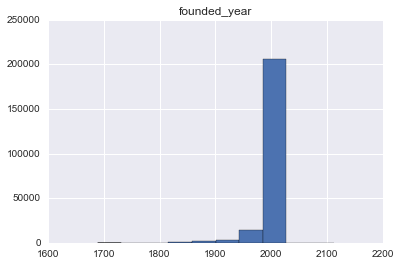

In [15]:
orgs.hist(column = 'founded_year')

In [16]:
#get rid of organizations that were founded before 1990 and after 2016

df = orgs[(orgs.founded_year >= 1990) & (orgs.founded_year <= 2016)].copy()

In [74]:
np.mean(df[df.founded_year >= 2000].groupby('founded_year').size())

10532.823529411764

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x136a45410>]], dtype=object)

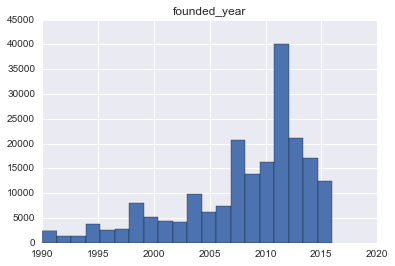

In [60]:
df.hist(column = 'founded_year',bins = 20)

In [18]:
set(df.funding_rounds)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22}

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x136a07b50>]], dtype=object)

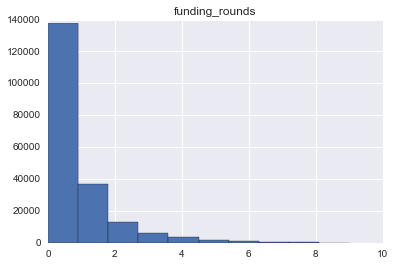

In [62]:
df[df.funding_rounds < 10].hist(column = 'funding_rounds',bins = 10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13eaca490>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13b6be490>]], dtype=object)

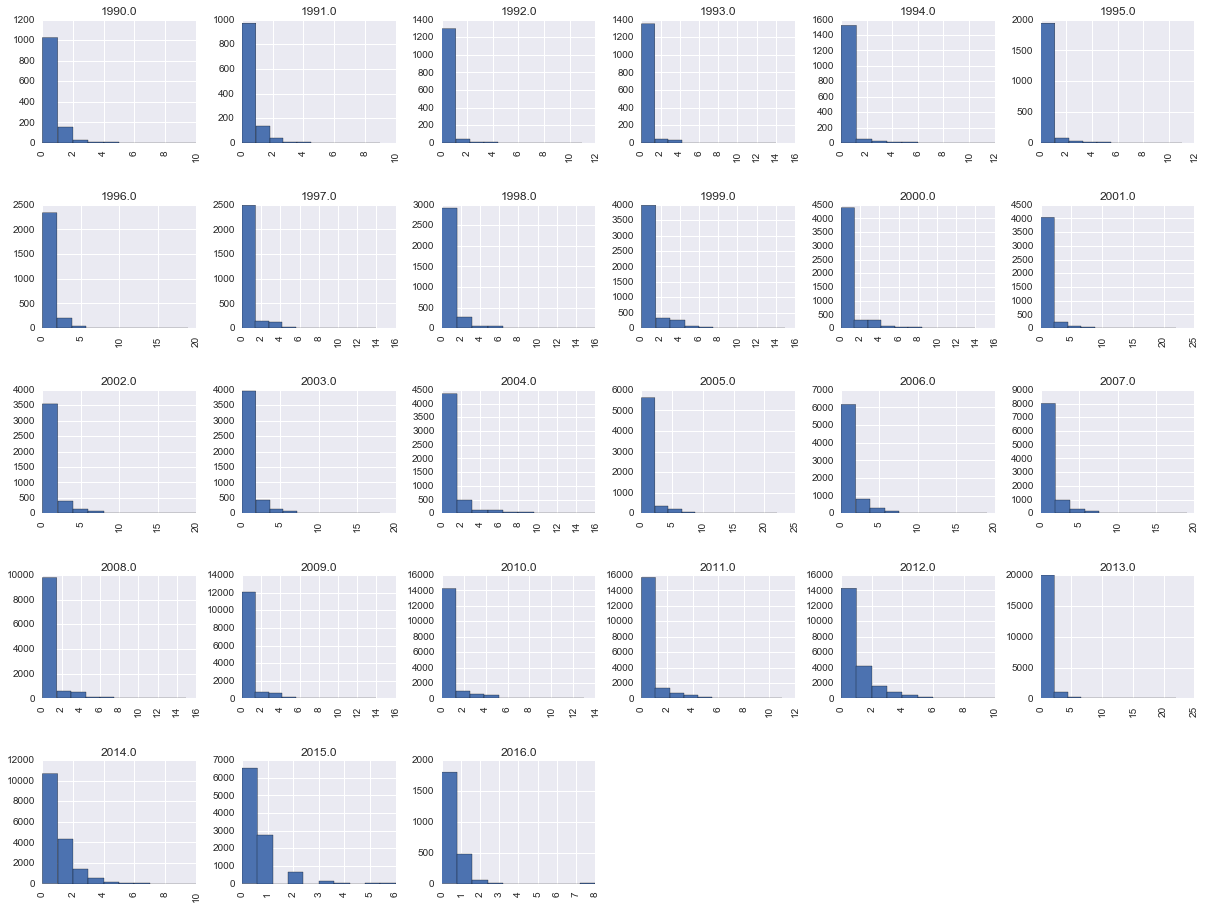

In [20]:
df.hist(column = "funding_rounds", by = 'founded_year', figsize = (20,16),layout = (5,6))

In [86]:
round_count = pd.DataFrame(df.groupby('funding_rounds').size()).reset_index()
round_count.columns = ['funding_rounds','count']

In [95]:
round_count['count'].sum()

201425

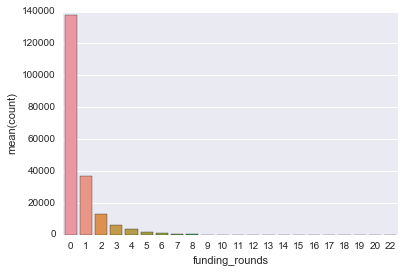

In [88]:
sn.barplot(x ='funding_rounds', y="count", data=round_count)

## Clean up Investors

In [63]:
investors.shape

(47379, 19)

In [22]:
investors.loc[0]

investor_name                                          Sequoia Capital
primary_role                                                  investor
domain                                                  sequoiacap.com
country_code                                                       USA
state_code                                                          CA
region                                                     SF Bay Area
city                                                        Menlo Park
investor_type                                          venture_capital
investment_count                                                  1242
total_funding_usd                                          3.40041e+10
founded_on                                                  1972-11-01
closed_on                                                          NaN
cb_url               https://www.crunchbase.com/organization/sequoi...
logo_url             https://www.crunchbase.com/organization/sequoi...
profil

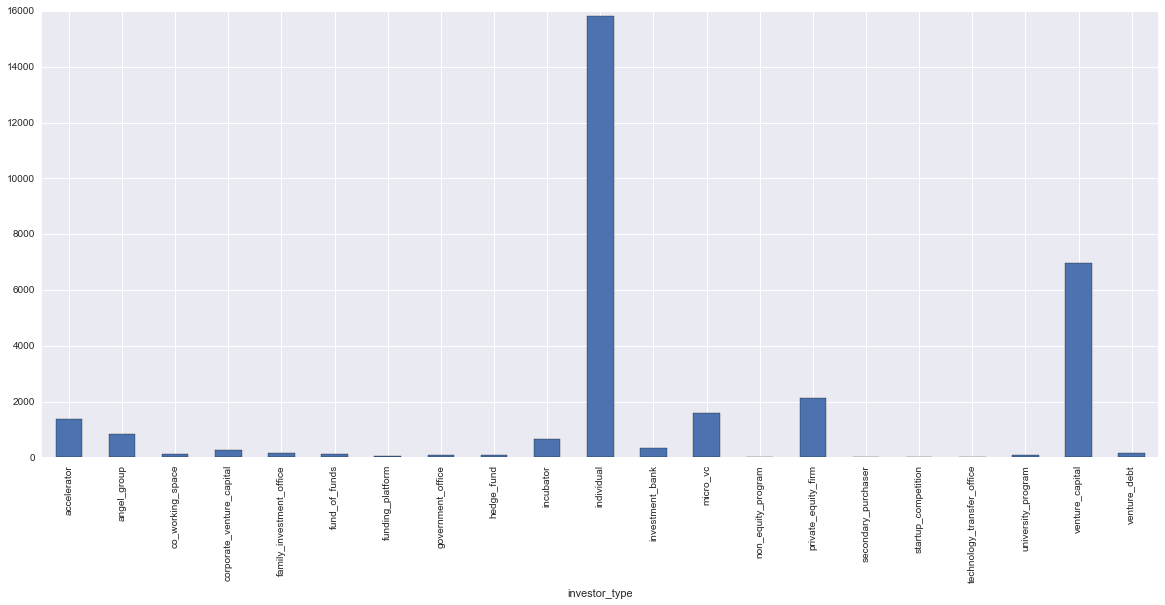

In [23]:
investors.groupby('investor_type').size().plot(kind = 'bar',figsize = (20,8))

In [24]:
#we will only predict on well known individuals, angel groups, corporate venture capital, family office, micro vc
#and venture capital

accepted_types = ['angel_group','corporate_venture_capital','family_investment_office','individual','micro_vc',
                  'venture_capital']

In [25]:
investors_df = investors[investors.investor_type.isin(accepted_types)].copy()

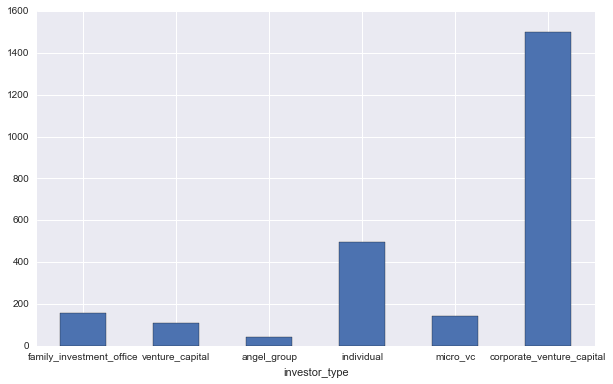

In [127]:
fig, ax = plt.subplots()
investors_df.groupby('investor_type').size().plot(ax=ax,kind = 'bar',figsize = [10,6])
ax.set_xticklabels(set(investors_df.investor_type), rotation=0)

In [121]:
np.mean(investors_df.investment_count)

42.90249897582958

In [65]:
np.median(investors_df.investment_count)

19.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x134582590>]], dtype=object)

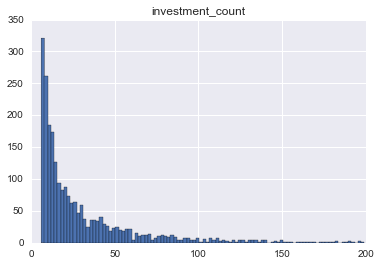

In [120]:
investors_df[investors_df.investment_count < 200].hist(column = 'investment_count',bins = 100)

In [28]:
#get date of investment for each investment

In [29]:
investments.head()

,funding_round_uuid,investor_uuid,is_lead_investor
0,0008d7cd-2233-7ac0-499f-d6bd79322751,ea5de28f-7493-f605-c3fd-51965a5b5aba,t
1,0015f710-ec05-371e-e658-dd1e46c497eb,c54493d1-89e8-db3c-bab3-ba4da8ee376f,t
2,003f45e1-1db5-5f91-35b4-b1ee9ca232f3,c61ec917-13b1-fa86-cf7d-88006a947914,f
3,003f45e1-1db5-5f91-35b4-b1ee9ca232f3,4884e025-054d-47d6-3c7e-6c397eee22cd,f
4,0044d614-0716-1a9b-8c31-9310b0c336bc,9e3a486a-99d5-1925-3339-57b6695133b0,t


In [30]:
rounds['announced_on'] = pd.to_datetime(rounds['announced_on'], errors = 'coerce')

In [31]:
investment_dates = pd.merge(investments,rounds[['funding_round_uuid','announced_on']], on = 'funding_round_uuid')

In [32]:
# get the last investment an investor made
most_recent_investment = pd.DataFrame(investment_dates.groupby('investor_uuid')['announced_on'].max()).reset_index()

In [33]:
most_recent_investment.head()
most_recent_investment.columns = ['uuid','most_recent_investment']

In [34]:
most_recent_investment.head()

,uuid,most_recent_investment
0,0005e438-8f64-d01c-822d-a2de10690fed,2011-08-09
1,000a3a71-e224-c35d-6476-65e0d6579830,2016-03-01
2,000c5688-ea1a-1abd-ed38-a36ad1fc47c8,2016-09-03
3,000ede33-6c08-c865-e88e-0a59ec5daee8,2015-04-05
4,00121759-7d9c-dc31-d0a7-60581cb33bb9,2013-05-31


In [35]:
investors_df = pd.merge(investors_df,most_recent_investment, on = 'uuid')

In [36]:
investors_df.head()

,investor_name,primary_role,domain,country_code,state_code,region,city,investor_type,investment_count,total_funding_usd,founded_on,closed_on,cb_url,logo_url,profile_image_url,twitter_url,facebook_url,uuid,updated_at,most_recent_investment
0,Sequoia Capital,investor,sequoiacap.com,USA,CA,SF Bay Area,Menlo Park,venture_capital,1242,3.400411e+10,1972-11-01,NaN,https://www.crunchbase.com/organization/sequoi...,https://www.crunchbase.com/organization/sequoi...,http://public.crunchbase.com/t_api_images/v141...,https://www.twitter.com/sequoia,http://www.facebook.com/sequoiacap,0c867fde-2b9a-df10-fdb9-66b74f355f91,2016-09-28 11:51:26.860329,2016-09-28
1,New Enterprise Associates,investor,nea.com,USA,CA,SF Bay Area,Menlo Park,venture_capital,1114,2.756342e+10,1977-01-01,NaN,https://www.crunchbase.com/organization/new-en...,https://www.crunchbase.com/organization/new-en...,http://public.crunchbase.com/t_api_images/v145...,https://www.twitter.com/neavc,http://www.facebook.com/neavc,47b84763-9727-7cdf-b194-2742e3963147,2016-09-28 13:52:29.052392,2016-09-26
2,Intel Capital,investor,intelcapital.com,USA,CA,SF Bay Area,Santa Clara,corporate_venture_capital,1053,2.379451e+10,1991-01-01,NaN,https://www.crunchbase.com/organization/intel-...,https://www.crunchbase.com/organization/intel-...,http://public.crunchbase.com/t_api_images/v139...,https://www.twitter.com/intelcapital,NaN,f3716725-552d-b9b5-59ad-de4ec64b1751,2016-09-29 07:09:45.592806,2016-09-19
3,Accel Partners,investor,accel.com,USA,CA,SF Bay Area,Palo Alto,venture_capital,952,2.219778e+10,1983-01-01,NaN,https://www.crunchbase.com/organization/accel-...,https://www.crunchbase.com/organization/accel-...,http://public.crunchbase.com/t_api_images/v144...,https://www.twitter.com/accel,http://www.facebook.com/accel,b08efc27-da40-505a-6f9d-c9e14247bf36,2016-09-28 03:50:11.161651,2016-09-27
4,Kleiner Perkins Caufield & Byers,investor,kpcb.com,USA,CA,SF Bay Area,Menlo Park,venture_capital,840,2.685646e+10,1972-03-01,NaN,https://www.crunchbase.com/organization/kleine...,https://www.crunchbase.com/organization/kleine...,http://public.crunchbase.com/t_api_images/v139...,https://www.twitter.com/kpcb,http://www.facebook.com/kpcbprofile,2d0a5bf0-e53e-9a07-2243-9bcd561421ec,2016-09-28 10:58:01.290589,2016-09-21


In [ ]:
investors_df.hist(column = 'investment_count',bins = 100, figsize = (20,8))

In [37]:
investors_df['most_recent_active_year'] = investors_df['most_recent_investment'].dt.year


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x138fb4850>]], dtype=object)

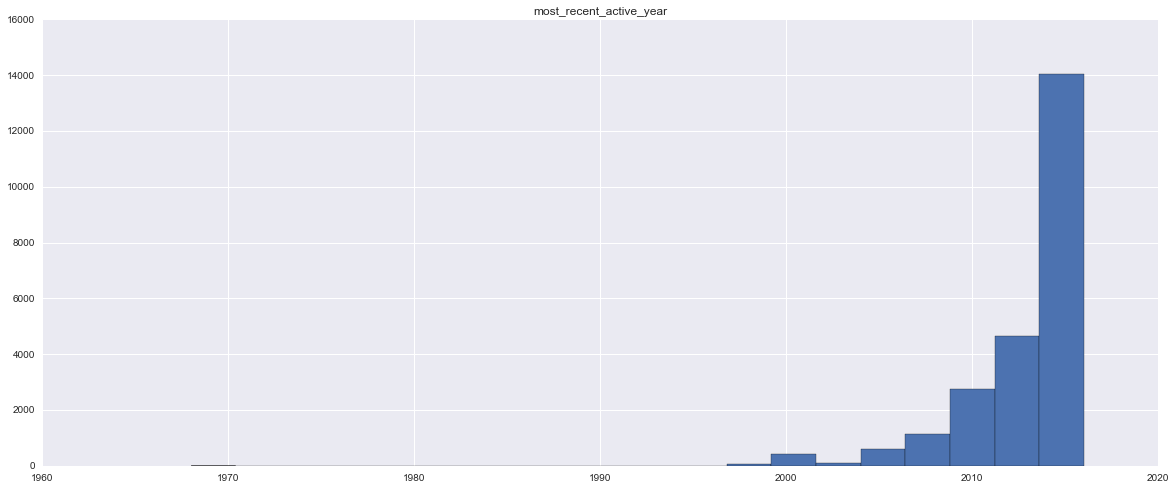

In [38]:
investors_df.hist(column = 'most_recent_active_year',bins = 20, figsize = (20,8))

In [39]:
#take only investors that have been active in the past year and have made more than 5 investments

investors_df = investors_df[(investors_df.most_recent_investment >= '2015-10-15') & 
                            (investors_df.investment_count > 5)].copy()

In [40]:
investors_df.shape[0]

2441

## Clean up Rounds

In [41]:
rounds.loc[0]

company_name                                                                 Apsiyon
country_code                                                                     TUR
state_code                                                                       NaN
region                                                                      Istanbul
city                                                                        Istanbul
company_category_list                                                  SaaS|Software
funding_round_type                                                           venture
funding_round_code                                                                 A
announced_on                                                     2016-09-29 00:00:00
raised_amount_usd                                                            2.5e+06
raised_amount                                                                    NaN
raised_amount_currency_code                                      

In [42]:
rounds.dtypes

company_name                                 object
country_code                                 object
state_code                                   object
region                                       object
city                                         object
company_category_list                        object
funding_round_type                           object
funding_round_code                           object
announced_on                         datetime64[ns]
raised_amount_usd                           float64
raised_amount                               float64
raised_amount_currency_code                  object
target_money_raised_usd                     float64
target_money_raised                         float64
target_money_raised_currency_code            object
post_money_valuation_usd                    float64
post_money_valuation                        float64
post_money_currency_code                    float64
investor_count                                int64
investor_nam

In [43]:
rounds['announced_on'] = pd.to_datetime(rounds['announced_on'], errors = 'coerce')

In [44]:
rounds['announced_year'] = rounds['announced_on'].dt.year

In [45]:
#get only rounds from companies in cleaned up orgs
rounds_df = rounds[rounds.company_uuid.isin(df.uuid)].copy()
rounds_df = rounds_df[(rounds_df.announced_year >= 1990) & (rounds_df.announced_year <= 2016)].copy()

In [46]:
print 'original rounds: %s, new count of rounds: %s' %(rounds.shape[0], rounds_df.shape[0])

original rounds: 145132, new count of rounds: 121227


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x138fa3950>]], dtype=object)

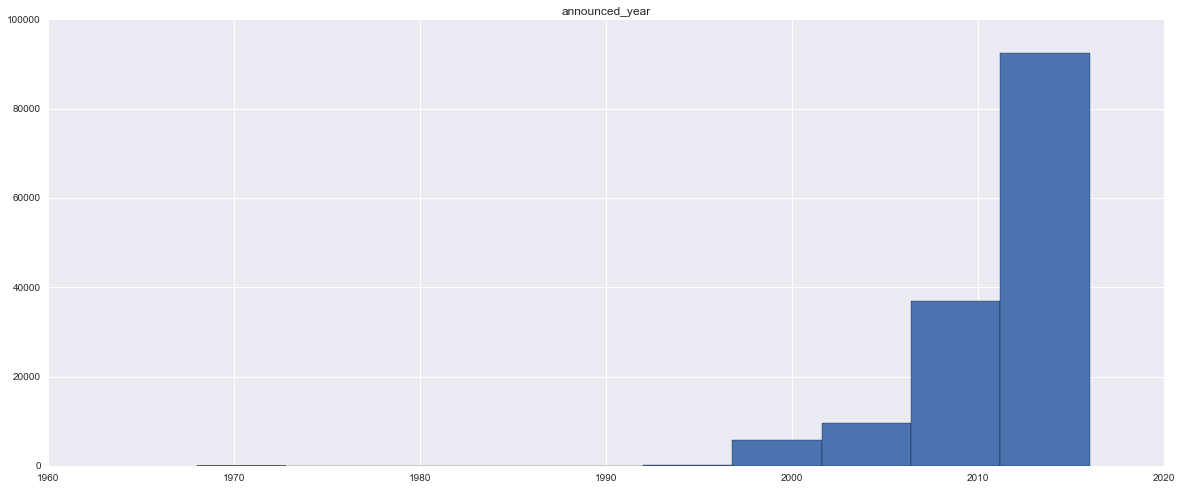

In [47]:
rounds.hist(column = 'announced_year',bins = 10, figsize = (20,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x136bb1790>]], dtype=object)

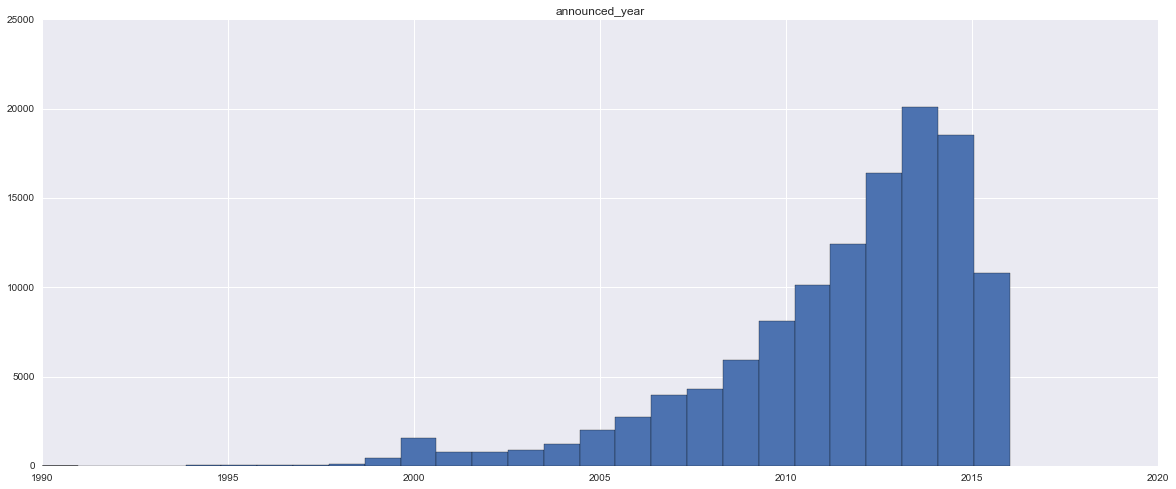

In [48]:
rounds_df.hist(column = 'announced_year',bins = 27, figsize = (20,8))

In [49]:
rounds_df.shape[0] * 0.15

18184.05

In [50]:
rounds_df[(rounds_df.announced_on >= '2015-08-01')].shape[0]

17824

## competitor

In [101]:
comps.drop_duplicates(['entity_uuid','competitor_uuid'],inplace = True)

In [109]:
comps_count = pd.DataFrame(comps.groupby('entity_uuid').size()).reset_index()
comps_count.columns = ['entity_uuid','competitor_count']

In [110]:
np.mean(comps_count['competitor_count'])

2.8965916347381864

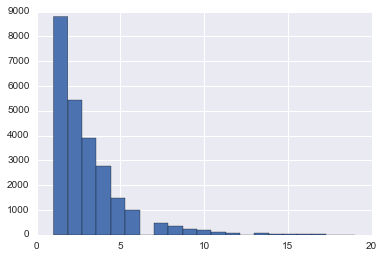

In [117]:
comps_count[comps_count.competitor_count <20].competitor_count.hist(bins = 21)